# Feature reduction and extraction


In this notebook we will extract features using deep learning method called Convultional autoencoder.

The input and the output to this method will be the galaxy images

---

let us call the data from the prevoius notebook

In [1]:
%store -r images_trainPre

In [2]:
images_trainPre.shape

torch.Size([8000, 1, 56, 56])

In [3]:
images_trainPre = images_trainPre.reshape(8000,56,56)

---

In [4]:
import tensorflow as tf
from source.galaxyencode import GalaxyEncoder

2022-10-18 14:44:09.264769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 14:44:12.011423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 14:44:12.011513: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 14:44:12.227856: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 14:44:59.904678: W tensorflow/stream_executor/platform/de

In [5]:
model = GalaxyEncoder()

2022-10-18 14:46:37.661976: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-18 14:46:37.662033: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-18 14:46:37.662063: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-001): /proc/driver/nvidia/version does not exist
2022-10-18 14:46:37.662619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(optimizer='sgd', loss='mse')


In [7]:
model.build((None, 56,56,1))
model.summary()

Model: "galaxy_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1568)              1320      
                                                                 
 sequential_1 (Sequential)   (None, 56, 56, 1)         225       
                                                                 
Total params: 1,545
Trainable params: 1,545
Non-trainable params: 0
_________________________________________________________________


In [8]:
import time

In [9]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
print(images_trainPre.shape)

(60000, 28, 28)
(10000, 28, 28)
torch.Size([8000, 56, 56])


In [10]:
import numpy as np

In [11]:
start = time.time()
print('Start Time: ', start)
model.fit(
    np.array(images_trainPre), np.array(images_trainPre),
    shuffle=True,
    batch_size=264,

    # validation_data= (images_trainPre, images_trainPre),
    epochs=30,
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="/users/hussein/work/galaxy-cluster/logs")]
)

Start Time:  1666097199.2840204
Epoch 1/30
31/31 [==============================] - 11s 311ms/step - loss: 1400.6427
Epoch 2/30
31/31 [==============================] - 10s 313ms/step - loss: 1400.1858
Epoch 3/30
31/31 [==============================] - 10s 317ms/step - loss: 1400.1860
Epoch 4/30
31/31 [==============================] - 10s 320ms/step - loss: 1400.1862
Epoch 5/30
31/31 [==============================] - 10s 314ms/step - loss: 1400.1860
Epoch 6/30
31/31 [==============================] - 10s 311ms/step - loss: 1400.1860
Epoch 7/30
31/31 [==============================] - 10s 314ms/step - loss: 1400.1859
Epoch 8/30
31/31 [==============================] - 10s 315ms/step - loss: 1400.1860
Epoch 9/30
31/31 [==============================] - 10s 312ms/step - loss: 1400.1860
Epoch 10/30
31/31 [==============================] - 10s 315ms/step - loss: 1400.1860
Epoch 11/30
31/31 [==============================] - 10s 311ms/step - loss: 1400.1862
Epoch 12/30
31/31 [============

In [12]:
import matplotlib.pyplot as plt


In [13]:
test = np.array(images_trainPre)
output = model.predict(test)

250/250 [==============================] - 6s 22ms/step


In [14]:
encoded_imgs = model.encoder(np.array(images_trainPre)).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

In [15]:
encoded_imgs = model.encoder.predict(np.array(images_trainPre))
decoded_imgs = model.decoder.predict(np.array(encoded_imgs))

250/250 [==============================] - 4s 14ms/step


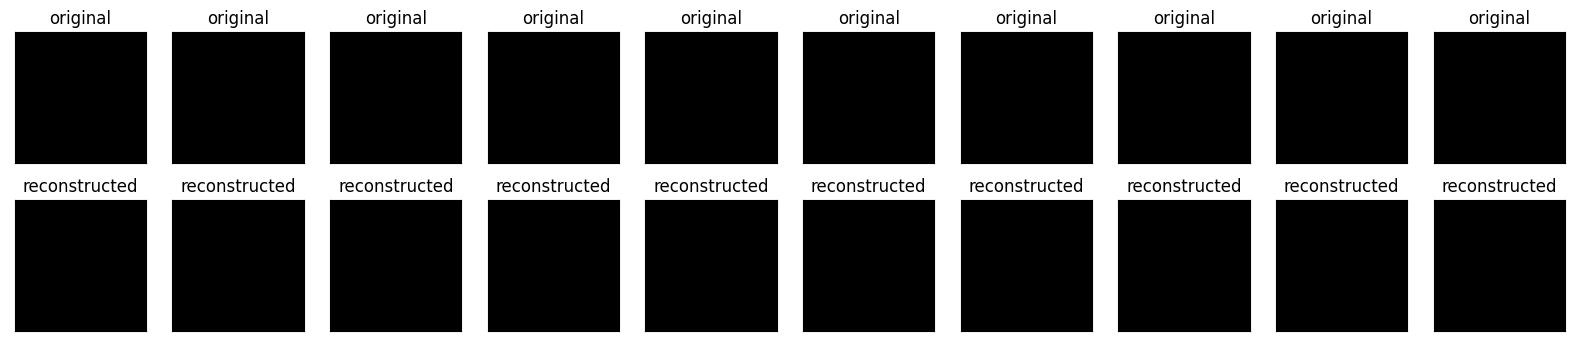

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(np.array(output)[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()